# DATA VISUALIZATION 
<hr style="height:5px;border-width:2;color:gray">

Data courtesy of: https://www.kaggle.com/leonardopena/marvel-vs-dc

# Dataset to be analysed: Marvel and DC movies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
md = pd.read_csv('db.csv')
mvl_10 = md[(md['Company'] == 'Marvel') & (md['Release'] <= 2015)]['Rate'].mean()
dc_10 = md[(md['Company'] == 'DC') & (md['Release'] <= 2015)]['Rate'].mean()
mvl_20 = md[(md['Company'] == 'Marvel') & (md['Release'] > 2015)]['Rate'].mean()
dc_20 = md[(md['Company'] == 'DC') & (md['Release'] > 2015)]['Rate'].mean()
mvl_11 = md[(md['Company'] == 'Marvel') & (md['Release'] <= 2015)]['Metascore'].mean()
dc_11 = md[(md['Company'] == 'DC') & (md['Release'] <= 2015)]['Metascore'].mean()
mvl_21 = md[(md['Company'] == 'Marvel') & (md['Release'] > 2015)]['Metascore'].mean()
dc_21 = md[(md['Company'] == 'DC') & (md['Release'] > 2015)]['Metascore'].mean()
mvl_10 = mvl_10*10
mvl_20 = mvl_20*10
dc_10 = dc_10*10
dc_20 = dc_20*10

mvl_00 = md[(md['Company'] == 'Marvel')]['Rate'].mean()
dc_00 = md[(md['Company'] == 'DC')]['Rate'].mean()
mvl_01 = md[(md['Company'] == 'Marvel')]['Metascore'].mean()
dc_01 = md[(md['Company'] == 'DC')]['Metascore'].mean()
mvl_0 = (mvl_00*10 + mvl_01) / 2
dc_0 = (dc_00*10 + dc_01) / 2
mvl_1 = (mvl_10 + mvl_11) / 2
dc_1 = (dc_10 + dc_11) / 2
mvl_2 = (mvl_20 + mvl_21) / 2
dc_2 = (dc_20 + dc_21) / 2
data = {'Years': ['Till 2015', 'Till 2015', 'After 2015', 'After 2015', 'Overall', 'Overall'],
        'Company': ['Marvel', 'DC', 'Marvel', 'DC', 'Marvel', 'DC'],
        'Mean': [mvl_1, dc_1, mvl_2, dc_2, mvl_0, dc_0]}
df = pd.DataFrame(data)
table = df.groupby(['Years', 'Company'])['Mean'].mean()


/Users/sanid/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
<ipython-input-34-f309731e88dc>:41: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


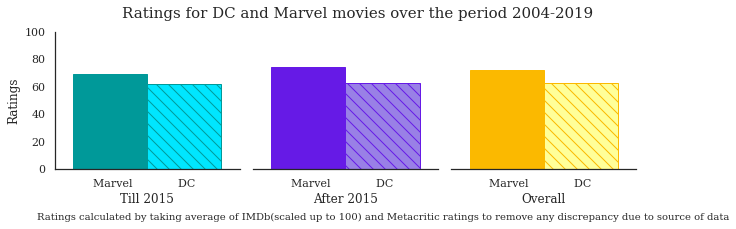

In [34]:
def chart(info):
    graph = sns.FacetGrid(info, col = 'Years', col_order = ["Till 2015", "After 2015", "Overall"], sharex = False)
    graph.map(sns.barplot, 'Years', 'Mean', 'Company', hue_order = ['Marvel', 'DC'])
    axes = np.array(graph.axes.flat)
    return plt.gcf(), axes
fig, axes = chart(df)
plt.figure(num = 1, figsize = (6, 3))

labels = ['Till 2015', 'After 2015', 'Overall']
for i, axe in enumerate(axes):
    axe.set_ylim(0,100)
    axe.set_xticklabels(["Marvel             DC  "])
    axe.set_xlabel(labels[i])
    axe.set_ylabel("")
    axe.set_title("")
    axe.tick_params(left = False)
axes.flat[0].set_ylabel("Ratings")
sns.despine(ax=axes[1], left=True)
sns.despine(ax=axes[2], left=True)
sns.set_context("paper")
sns.set(font='serif')
sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Verdana", "serif"]
    })


#plt.figtext(0.5, 0.01, "one text and next text", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.annotate('Ratings calculated by taking average of IMDb(scaled up to 100) and Metacritic ratings to remove any discrepancy due to source of data', 
            xy = (1.5, -0.35),
             xycoords='axes fraction',
             ha='right',
            va="center", 
            fontsize=10)




fig.suptitle("Ratings for DC and Marvel movies over the period 2004-2019", fontsize=15, x=0.55)
plt.tight_layout()
colors = [
        [0.0, 0.6, 0.6],          
        [0.0, 0.9, 1],                    
        [0.4, 0.1, 0.9],
        [0.6, 0.5, 0.9],
        [0.984375, 0.7265625, 0], 
        [1, 1, 0.6]              
    ]
for i in range(3):


    dark_color = colors[i*2]
    light_color = colors[i*2 + 1]

        # These are the patches (matplotlib's terminology
        # for the rectangles corresponding to the bars)
    p1, p2 = axes[i].patches

        # The first bar gets the dark color
    p1.set_color(dark_color)
        
        # The second bar gets the light color, plus
        # hatch marks int he dark color
    p2.set_color(light_color)
    p2.set_edgecolor(dark_color)
    p2.set_hatch('\\\\')
    
    
    


plt.show()

## Useful insights:
1. Marvel movies have been qualitatively better than DC movies since the franchises started releasing movies.
2. The gulf in quality between Marvel and DC movies increased recently(post 2015).
3. The quality of DC movies has remained the same over time whereas Marvel movies have seen an increase in quality.